In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
data_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv"
df = pd.read_csv(data_url)
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# Q1: Do smokers have higher insurance charges than non-smokers?

**Null Hypothesis (H0)**: There is no significant difference in the average (mean) insurance charges between smokers and non-smokers.

**Alternative Hypothesis (Ha)**: There is a significant difference in the average (mean) insurance charges between smokers and non-smokers.

- **_Independence_**: The data should be collected independently, meaning that the insurance charges for each person are not related to or influenced by the charges of other people.

- **_Normality_**: The distribution of insurance charges should be approximately normal within each group (smokers and non-smokers). This means that the charges should follow a bell-shaped curve without extreme outliers.

- **_Homogeneity of Variances_**: The variances of insurance charges should be roughly equal between the two groups (smokers and non-smokers). In other words, the spread or variability of charges should be similar for both groups.

In [2]:
# Separate the smokers and non smokers
smokers_charges = df[df['smoker'] == 'yes']['charges']
non_smokers_charges = df[df['smoker'] == 'no']['charges']

In [3]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(smokers_charges, non_smokers_charges)
alpha = 0.05

In [4]:
# Interpret the p-value and reject/fail to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in insurance charges between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in insurance charges between smokers and non-smokers.")

print("p-value:", p_value)

Reject the null hypothesis.
There is a significant difference in insurance charges between smokers and non-smokers.
p-value: 8.271435842179102e-283


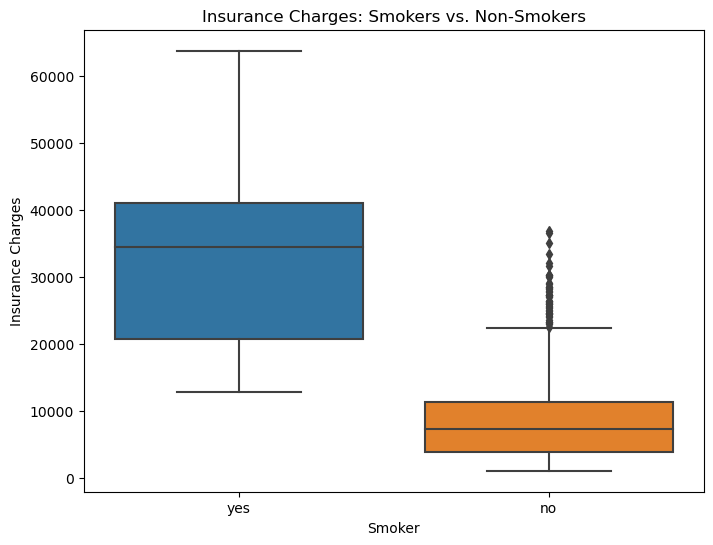

In [5]:
# Visualize the distributions using box plots
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df['smoker'], y=df['charges'], ax=ax)
ax.set_xlabel('Smoker')
ax.set_ylabel('Insurance Charges')
ax.set_title('Insurance Charges: Smokers vs. Non-Smokers')
plt.show()

# Q2: Are men more likely to smoke than women?
- **_Null Hypothesis (H0):_ The proportion of smokers is the same for both men and women.**

- **_Alternative Hypothesis (Ha):_ The proportion of smokers differs between men and women.**

Since we are comparing the proportions of smokers between two groups (men and women), and the data has two categories (smoker and non-smoker), we can use a chi-square test for independence.

**Test Assumptions:**

- **_Independence_**: The chi-square test assumes that the data is collected independently. In this case, we assume that the individuals in the dataset were sampled randomly, and there is no relationship or dependency between the smoking habits and the gender of the individuals.

- **_Binary Data_**: The information we are comparing should be divided into only two categories. In this case, we are looking at whether someone is a smoker or not, and whether they are male or female.

- **_Expected Frequency_**: The number of people in each group (smokers and non-smokers, males and females) should be large enough. Each group should have at least 5 people so that the statistical test works well.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Q2: Are men more likely to smoke than women?
males = df.loc[df['sex'] == 'male'].copy()
females = df.loc[df['sex'] == 'female'].copy()

In [7]:
# Combine male and female data to test together
combined = pd.concat([males, females], ignore_index=True)

# Create contingency table: smoker vs. sex
contingency_table = pd.crosstab(combined['smoker'], combined['sex'])

In [8]:
# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

alpha_chi2 = 0.05

In [9]:
# Interpret the p-value and reject/fail to reject the null hypothesis
if p_value < alpha_chi2:
    print("Reject the null hypothesis.")
    print("There is a significant difference in smoking habits between men and women.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in smoking habits between men and women.")

print("p-value:", p_value)

Reject the null hypothesis.
There is a significant difference in smoking habits between men and women.
p-value: 0.006548143503580696


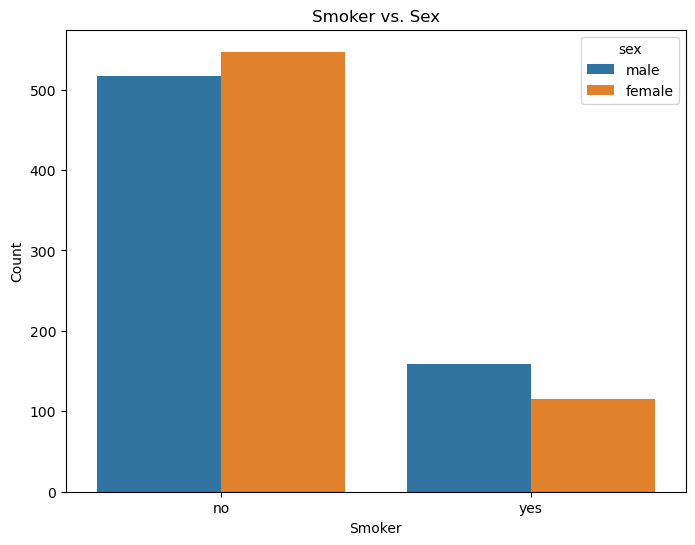

In [10]:
# Visualize the distributions using bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', hue='sex', data=combined)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker vs. Sex')
plt.show()

# Q3: Do different regions have different charges, on average?
- **Null Hypothesis (H0): The average charges are the same for all regions.**

- **Alternative Hypothesis (Ha): The average charges differ between at least two regions.** 

Since we are comparing the means of the charges for multiple groups (regions) and the data is independent, we can use a one-way ANOVA (Analysis of Variance) test.

**Assumptions**
- Independence: Assuming the data is collected independently.
- Normality: The data in each group (region) should be approximately normally distributed.
- Variances: The variances of the charges in each group should be equal.

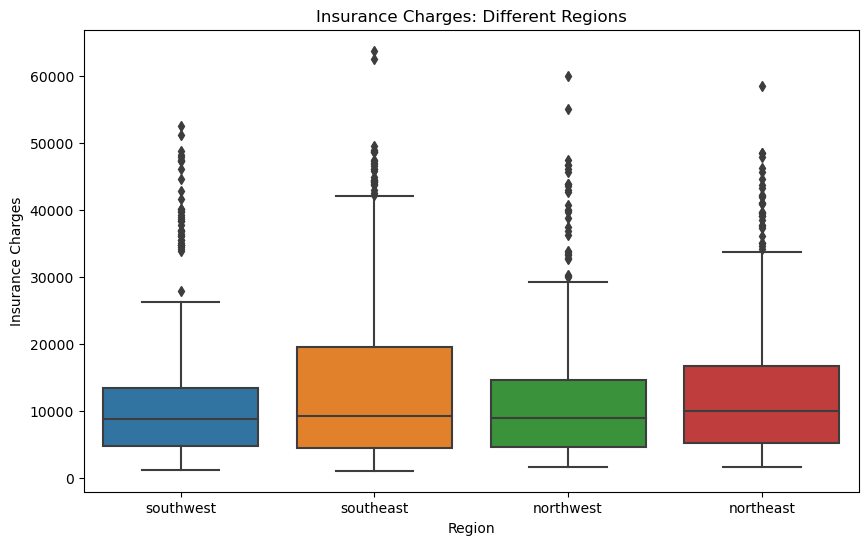

In [11]:
# Visualize the distributions using box plots
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['region'], y=df['charges'], ax=ax)
ax.set_xlabel('Region')
ax.set_ylabel('Insurance Charges')
ax.set_title('Insurance Charges: Different Regions')
plt.show()

In [12]:
# Perform one-way ANOVA test
from scipy.stats import f_oneway

regions = df['region'].unique()
grouped_data = [df[df['region'] == r]['charges'] for r in regions]

In [13]:
f_statistic, p_value_anova = f_oneway(*grouped_data)

alpha_anova = 0.05

In [14]:
# Interpret the p-value and reject/fail to reject the null hypothesis
if p_value_anova < alpha_anova:
    print("Reject the null hypothesis.")
    print("There is a significant difference in insurance charges among different regions.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in insurance charges among different regions.")

print("p-value:", p_value_anova)

Reject the null hypothesis.
There is a significant difference in insurance charges among different regions.
p-value: 0.0308933560705201
